# EDA

In [114]:
# import librarties
import pandas as pd
import numpy as np


In [115]:
# read cleaned data
df=pd.read_csv("salary_data_cleaned.csv")
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,employer_provided,state,same_State,age,python_yn,R_yn,spark,aws,excel
0,Senior Data Scientist,$87K - $173K (Employer provided),Advanced analytics knowledge and application i...,3.8,Abbott Laboratories,"Alameda, CA",-1,-1,-1,-1,...,130.0,1,CA,0,-1,0,0,1,0,0


In [116]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'ml engineer'
    elif 'manager' in title.lower():
        return 'manager'
    else:
        return 'na'
    
def seniority_simplifier(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower():
        return 'junior'
    else:
        return 'na'

In [117]:
df["job_simp"]=df["Job Title"].apply(title_simplifier)
df["seniority"]=df["Job Title"].apply(seniority_simplifier)

In [118]:
df.job_simp.value_counts(),df.seniority.value_counts()

(job_simp
 data scientist    1
 Name: count, dtype: int64,
 seniority
 senior    1
 Name: count, dtype: int64)

In [119]:
# job state
print(df["state"].value_counts())
#replace California with CA
df["state"]=df.state.apply(lambda x:x.strip().lower())
df["state"]=df["state"].replace({"California":"CA","New York":"NY","Texas":"TX"})

state
CA    1
Name: count, dtype: int64


In [120]:
# job description length
df["desc_len"]=df["Job Description"].apply(lambda x: len(x))

In [121]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != -1 else 0)

In [122]:
df["Competitors"].head()

0   -1
Name: Competitors, dtype: int64

In [123]:
# hourly wage to annual wage
df["min_salary"]=df.apply(lambda x: x.min_salary*2 if x.hourly == -1 else x.min_salary,axis=1)
df["max_salary"]=df.apply(lambda x: x.max_salary*2 if x.hourly == -1 else x.max_salary,axis=1)

In [124]:
df[df.hourly == 1][["hourly","min_salary","max_salary"]]


,hourly,min_salary,max_salary


In [125]:
df["company_txt"]=df["Company Name"].apply(lambda x: x.replace('\n',''))

In [126]:
df.describe()

,Rating,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,...,employer_provided,same_State,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,3.8,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,87.0,...,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,220.0,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.8,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,87.0,...,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,220.0,0.0
25%,3.8,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,87.0,...,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,220.0,0.0
50%,3.8,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,87.0,...,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,220.0,0.0
75%,3.8,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,87.0,...,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,220.0,0.0
max,3.8,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,87.0,...,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,220.0,0.0


In [127]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'hourly', 'avg_salary', 'employer_provided',
       'state', 'same_State', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp',
       'company_txt'],
      dtype='object')

<Axes: >

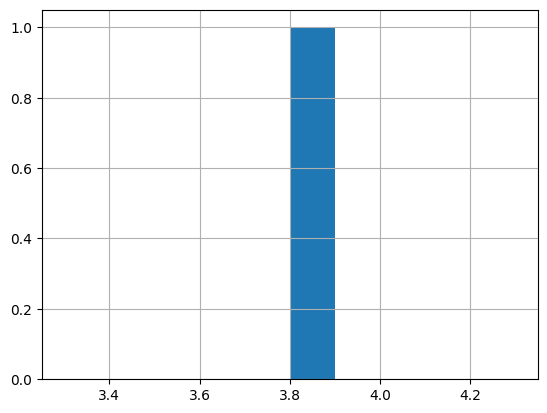

In [128]:
df.Rating.hist()

<Axes: >

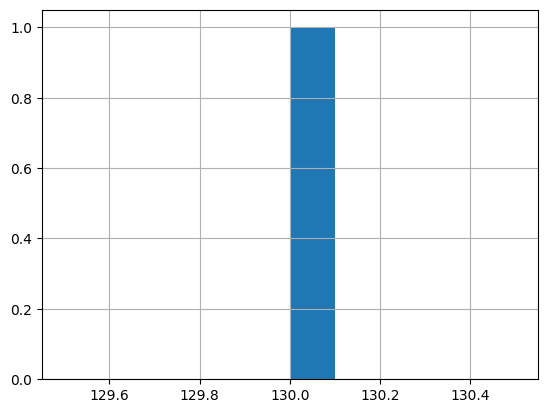

In [129]:
df.avg_salary.hist()

<Axes: >

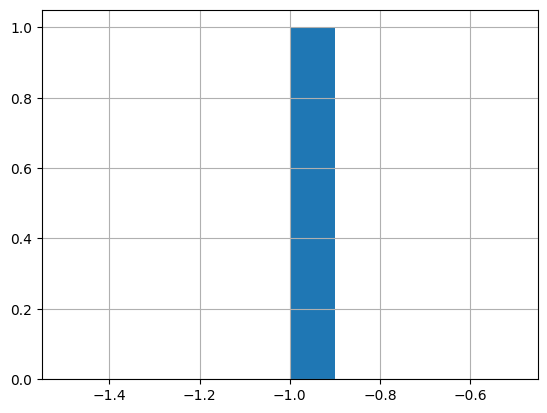

In [130]:
df.age.hist()

<Axes: >

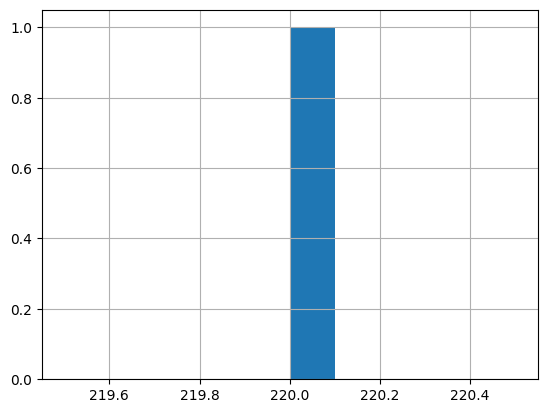

In [131]:
df.desc_len.hist()

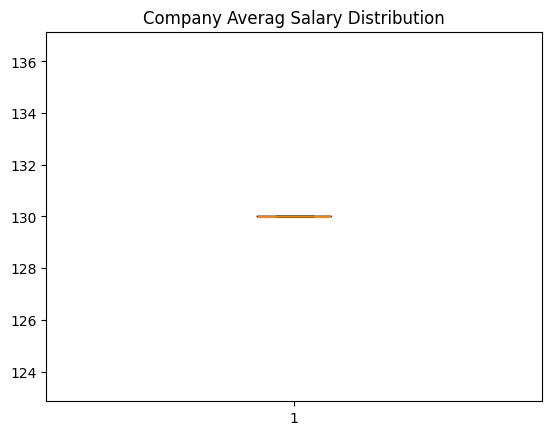

In [132]:
import matplotlib.pyplot as plt
plt.title("Company Averag Salary Distribution")
plt.boxplot(df.avg_salary)
plt.show()

In [133]:
df[["age","avg_salary","desc_len","Rating"]].corr()

,age,avg_salary,desc_len,Rating
age,NaN,NaN,NaN,NaN
avg_salary,NaN,NaN,NaN,NaN
desc_len,NaN,NaN,NaN,NaN
Rating,NaN,NaN,NaN,NaN


d:\gitRepos\salary_estimator\venv\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
d:\gitRepos\salary_estimator\venv\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

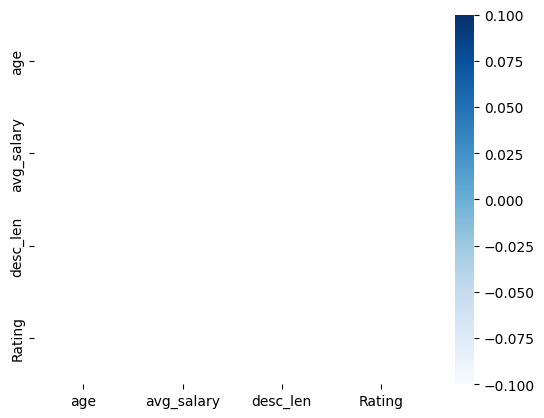

In [134]:
import seaborn as sns
sns.heatmap(df[["age","avg_salary","desc_len","Rating"]].corr(),annot=True,cmap="Blues")

In [135]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'hourly', 'avg_salary', 'employer_provided',
       'state', 'same_State', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp',
       'company_txt'],
      dtype='object')

In [136]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'state','same_State', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

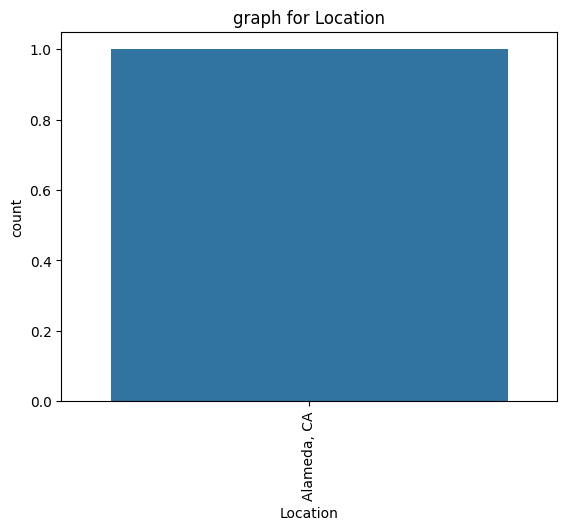

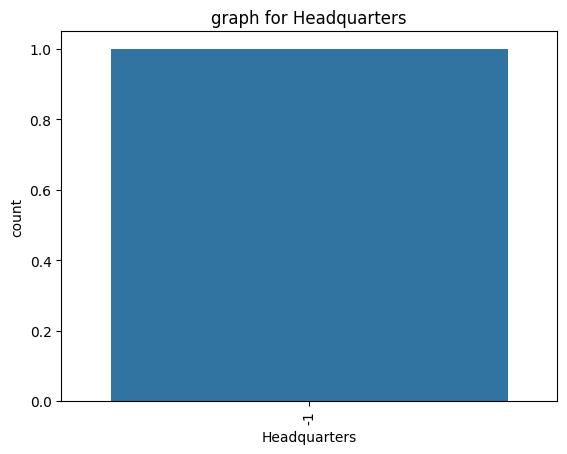

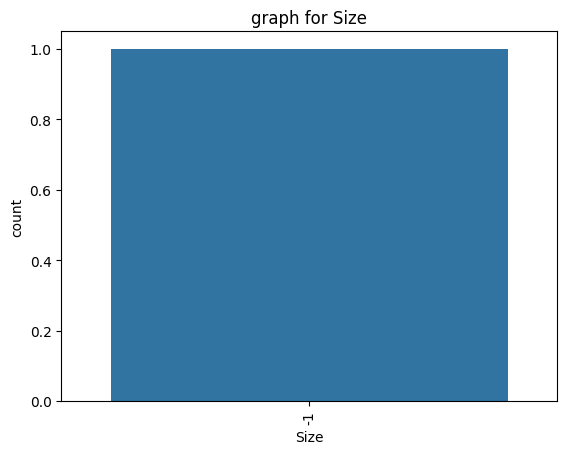

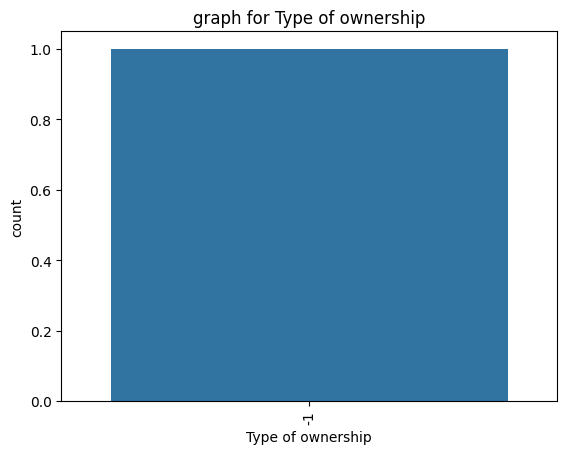

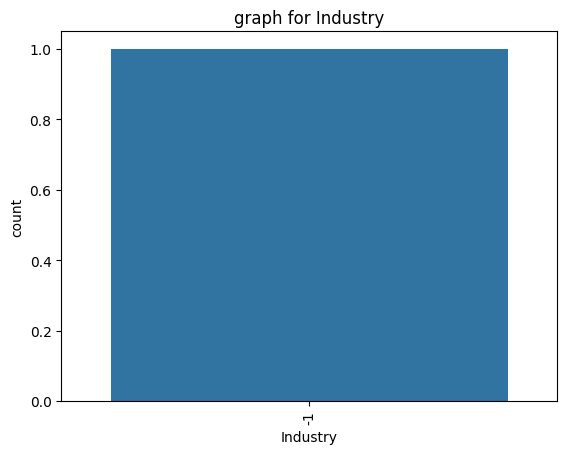

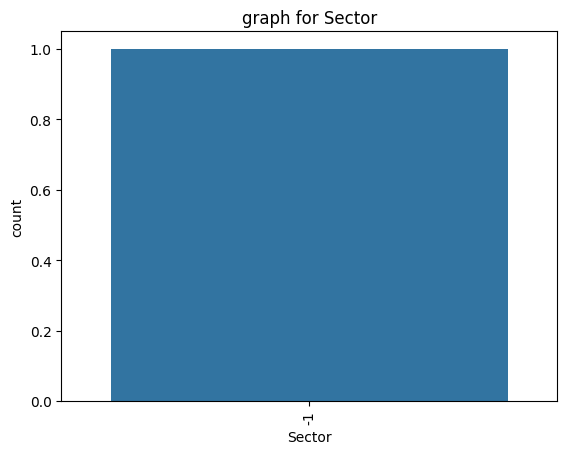

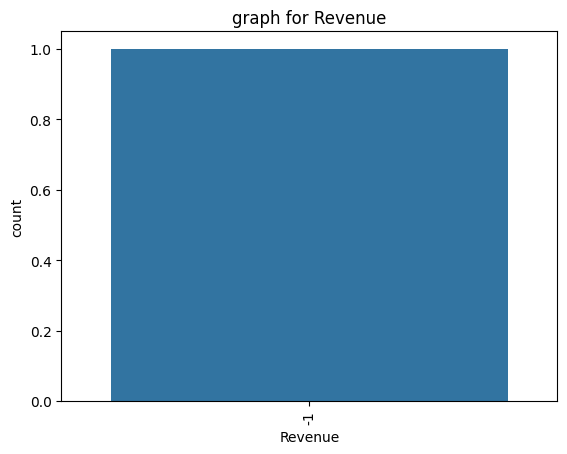

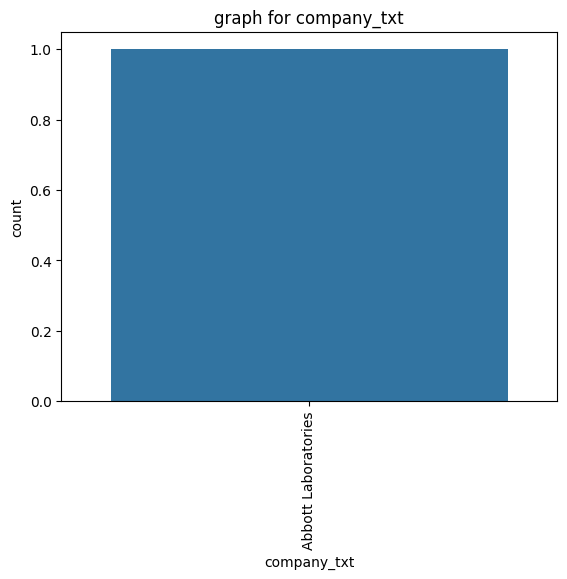

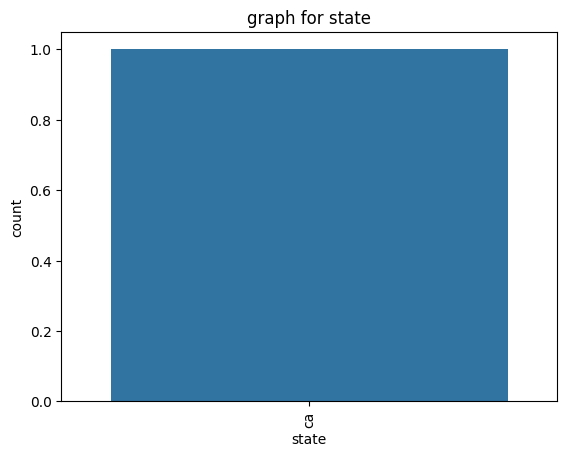

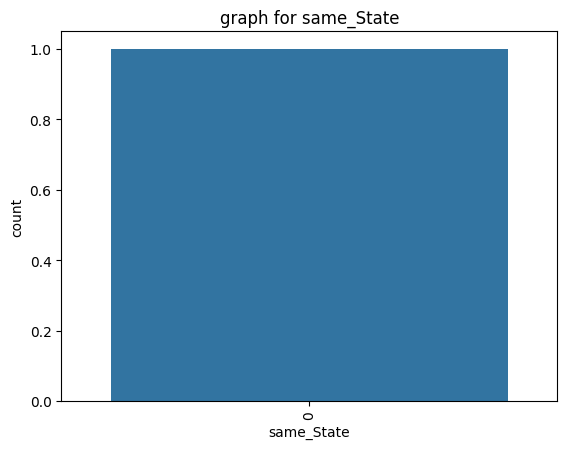

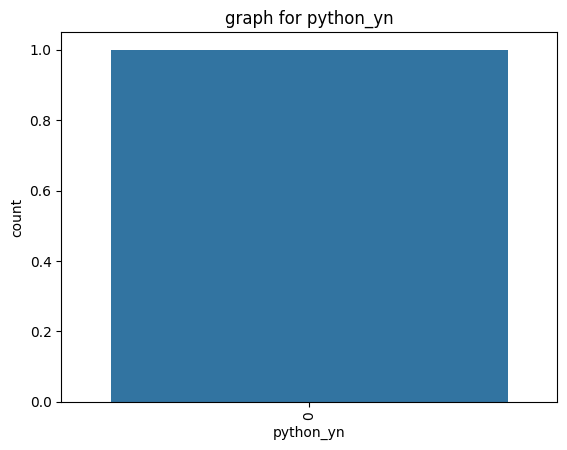

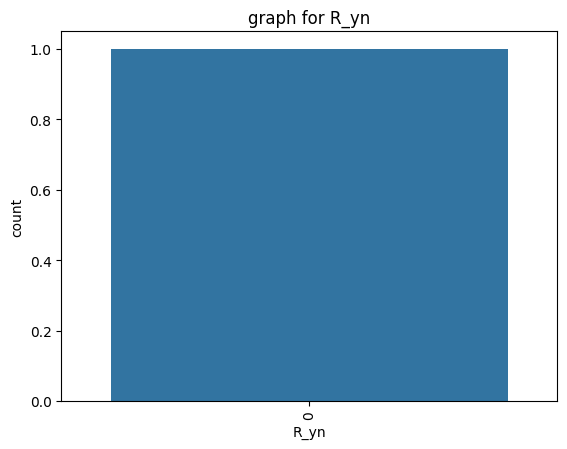

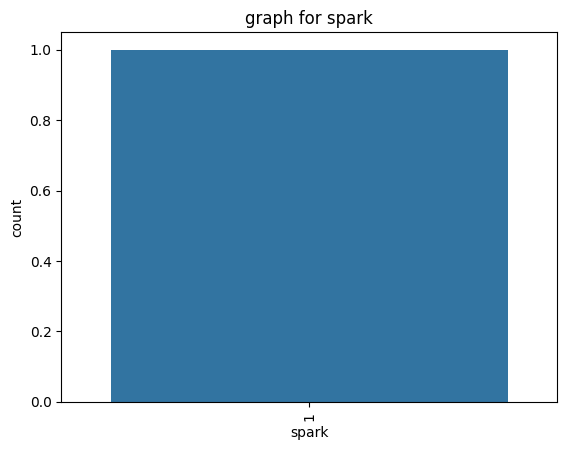

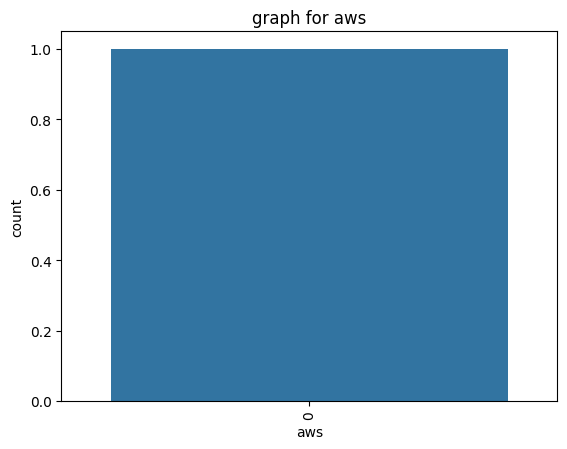

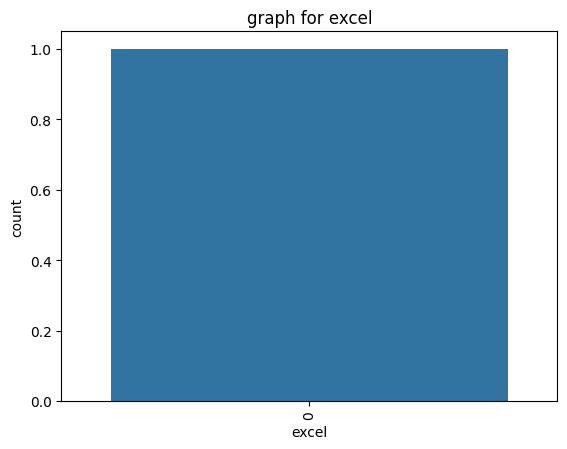

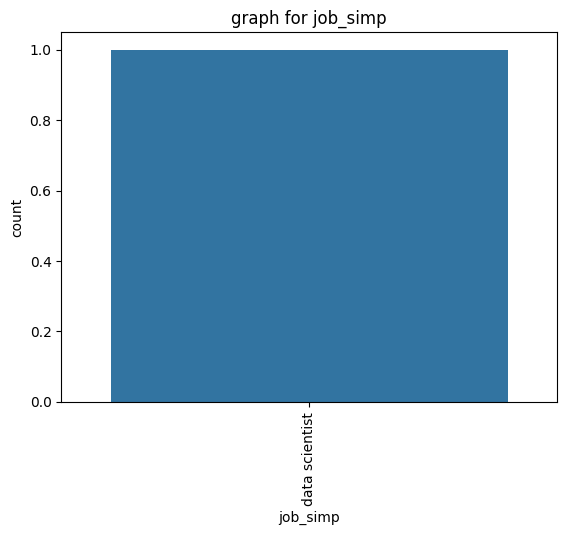

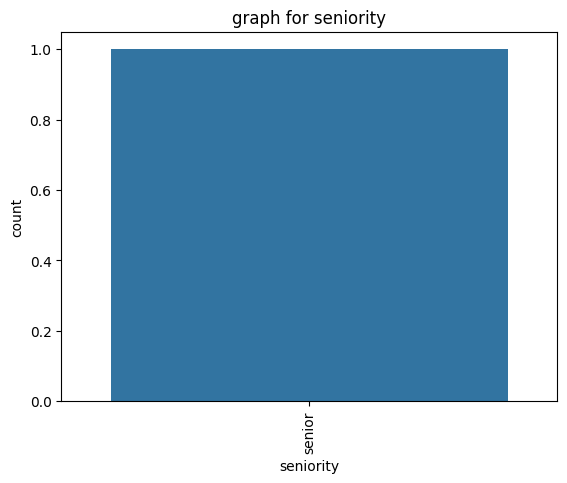

In [137]:
for i in df_cat.columns:
    cat_num=df_cat[i].value_counts()
    plt.title("graph for {}".format(i,len(cat_num)))
    sns.barplot(x=cat_num.index,y=cat_num)
    plt.xticks(rotation='vertical')
    plt.show()

In [138]:
# pivot tables

pd.pivot_table(df,index='job_simp',values='avg_salary')

,avg_salary
job_simp,
data scientist,130.0


In [139]:

pd.pivot_table(df,index=['job_simp',"seniority"],values='avg_salary')

,,avg_salary
job_simp,seniority,
data scientist,senior,130.0


In [140]:

pd.pivot_table(df,index='state',values='avg_salary').sort_values("avg_salary",ascending=False)

,avg_salary
state,
ca,130.0


In [141]:
pd.set_option('display.max_rows',None)

In [142]:

pd.pivot_table(df,index=["state",'job_simp',],values='avg_salary',aggfunc='count').sort_values('state',ascending=False)

,,avg_salary
state,job_simp,
ca,data scientist,1


In [143]:
# filter only base don datas scientist

pd.pivot_table(df[df.job_simp=="data scientist"],index=["state",'job_simp',],values='avg_salary',aggfunc='count').sort_values('avg_salary',ascending=False)

,,avg_salary
state,job_simp,
ca,data scientist,1


In [144]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'hourly', 'avg_salary', 'employer_provided',
       'state', 'same_State', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp',
       'company_txt'],
      dtype='object')

In [154]:
# rating , industry, sector , revenue, number of comp, hourly, employer provided, python, r spark, aws, excel, desc_len, typ eof ownership
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [155]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
3.8          130.0
Industry
          avg_salary
Industry            
-1             130.0
Sector
        avg_salary
Sector            
-1           130.0
Revenue
         avg_salary
Revenue            
-1            130.0
num_comp
          avg_salary
num_comp            
0              130.0
hourly
        avg_salary
hourly            
0            130.0
employer_provided
                   avg_salary
employer_provided            
1                       130.0
python_yn
           avg_salary
python_yn            
0               130.0
R_yn
      avg_salary
R_yn            
0          130.0
spark
       avg_salary
spark            
1           130.0
aws
     avg_salary
aws            
0         130.0
excel
       avg_salary
excel            
0           130.0
Type of ownership
                   avg_salary
Type of ownership            
-1                      130.0
avg_salary


ValueError: Grouper for 'avg_salary' not 1-dimensional

In [156]:
pd.pivot_table(df_pivots,index="Revenue",columns="python_yn",values="avg_salary", aggfunc='count')

python_yn,0
Revenue,
-1,1


In [157]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


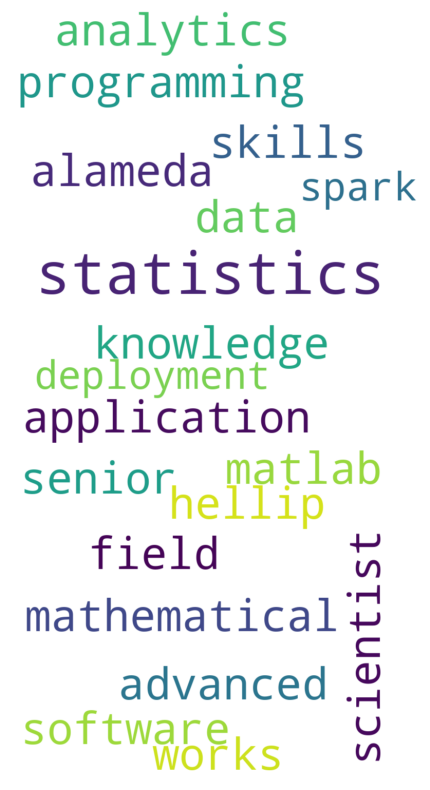

In [164]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()